---
title: "AMATH 583 HOMEWORK 3"
author: "Eunki Chung"
date: today
date-format: long
output: pdf_document
format:
  pdf:
    template-partials:
      - title.tex
    geometry:
      - top=20mm
      - bottom=20mm
      - left=20mm
      - right=20mm
    # fig-width: 4
    # fig-height: 3
---


# 2. Compiler Optimization

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

def prep(data):
    data.columns = header
    kij = data[data["func"]=="mm_kij"]
    jki = data[data["func"]=="mm_jki"]
    kij_sp = kij[kij.bit==32]
    kij_dp = kij[kij.bit==64]
    jki_sp = jki[jki.bit==32]
    jki_dp = jki[jki.bit==64]
    
    return kij_sp, jki_sp, kij_dp, jki_dp

header = ["func", "N", "n_trials", "FLOPs", "bit"]
files = ["default.csv", "o3.csv", "ffast-math.csv"]
data = []
for file in files:
    dfs = prep(pd.read_csv(file, header=None))
    data.append(dfs)

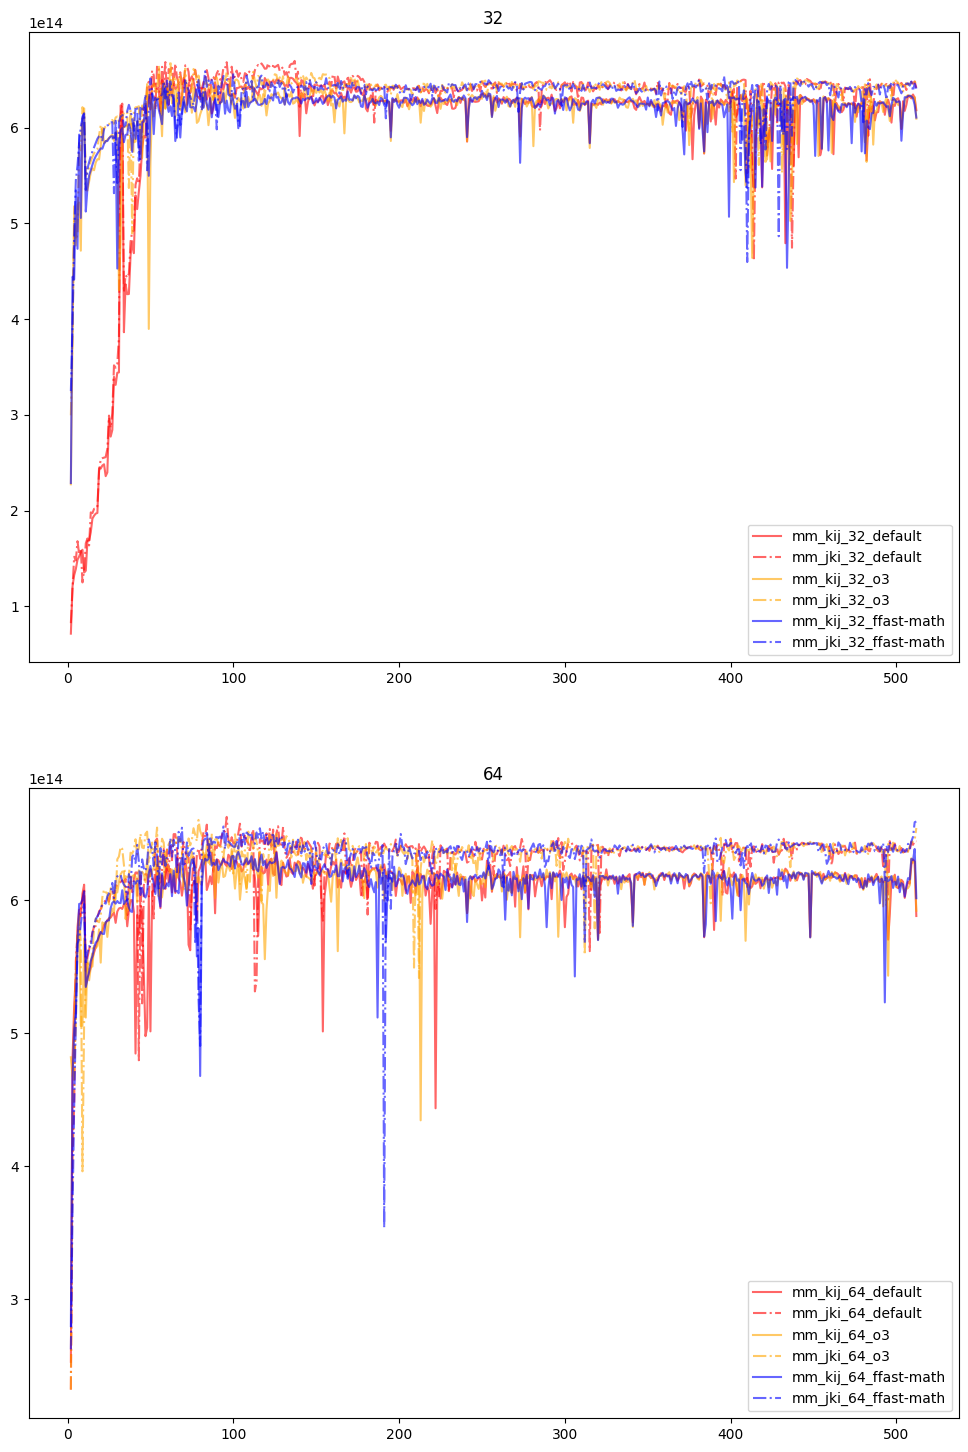

In [13]:
colors = ["red", "orange", "blue"]
ltys = ["-", "-."]


def plot(data):
    fig, axs = plt.subplots(2, figsize=(12, 18))

    for k, dfs in enumerate(data):
        opt = files[k].rstrip(".csv")
        for i, df in enumerate(dfs):
            if i < 2:
                ax = axs[0]
            else:
                ax = axs[1]
            funcname = df.func.iloc[0]
            lty = ltys[funcname != "mm_kij"]
            c = colors[k]
            ax.plot(df.N, df.FLOPs, label=f"{funcname}_{df.bit.iloc[0]}_{opt}",
                    alpha=0.6, ls=lty, color=c)
            ax.legend()
            ax.set_title(f"{df.bit.iloc[0]}")
    plt.show()


plot(data)


# 3. Strassen Algorithm

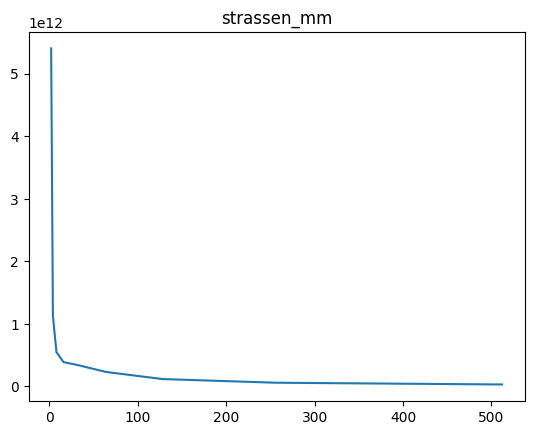

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

header = ["func", "N", "n_trials", "FLOPs"]
data = pd.read_csv("strassen.csv", header=None)
data.columns = header

plt.plot(data.N, data.FLOPs)
plt.title("strassen_mm")
plt.show()